![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Color enhancemente using Equalization

1. Take color image

2. Conversion RGB to HSV

3. Equalize V channel only!

4. Conversion HSV to RGB


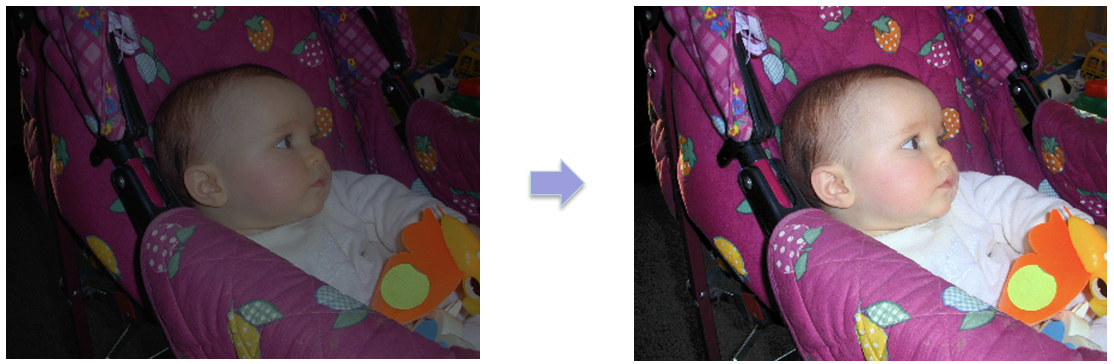

In [ ]:
!wget https://www.dropbox.com/s/v2qdaolqds93kx0/valeria.png

--2023-11-28 12:48:22--  https://www.dropbox.com/s/v2qdaolqds93kx0/valeria.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/v2qdaolqds93kx0/valeria.png [following]
--2023-11-28 12:48:23--  https://www.dropbox.com/s/raw/v2qdaolqds93kx0/valeria.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce7872a75ae5c5dc53d6a60c66b.dl.dropboxusercontent.com/cd/0/inline/CIYOjVP1V7zWBcgw5caDi6EUTLUH-oiLfmvYcXm2PE7U0SUtmESrrF7D6QJ1HkKgPhntOagefdjwB__QpEbOQC0R4e_Blcpe9npD75lwMzjh7RchkeiKDJAmRTKGcaJHis4/file# [following]
--2023-11-28 12:48:24--  https://uce7872a75ae5c5dc53d6a60c66b.dl.dropboxusercontent.com/cd/0/inline/CIYOjVP1V7zWBcgw5caDi6EUTLUH-oiLfmvYcXm2PE7U0SUtmESrrF7D6QJ1HkKgPhntOagefdjwB__QpEbOQC0R4e_Blcpe9npD75lwMzjh7RchkeiKDJAmRTKG

In [ ]:
def imhist3(X):
  (N,M,P) = X.shape
  n = 256
  for p in range(3):
    h = np.zeros((256,))
    for i in range(N):
      for j in range(M):
        x = X[i,j,p]
        h[x] = h[x]+1
    plt.figure(figsize=(30,9))
    plt.bar(range(n),h[0:n])
    plt.title('channel '+str(p))
    plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Original Image (dark)

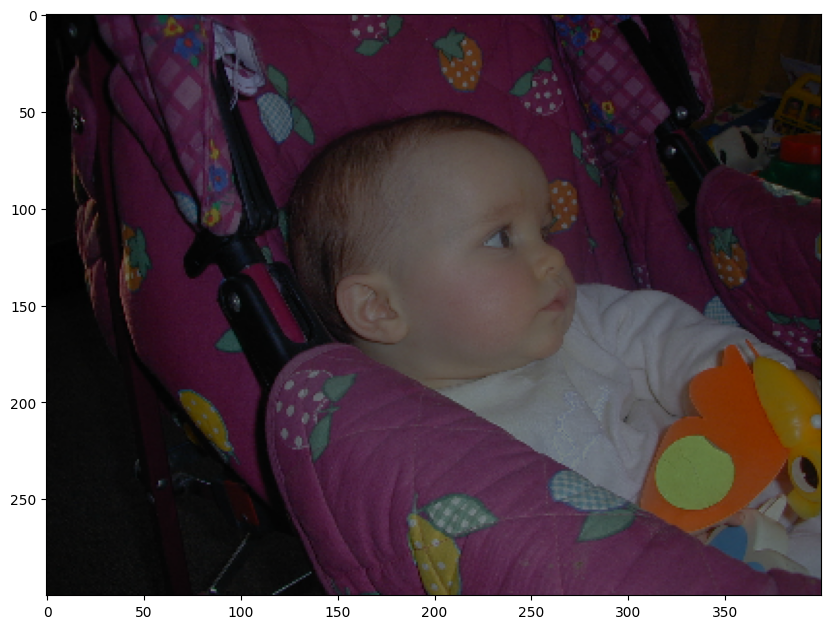

In [ ]:
I = cv2.imread('valeria.png')
plt.figure(figsize=(10,12))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.show()

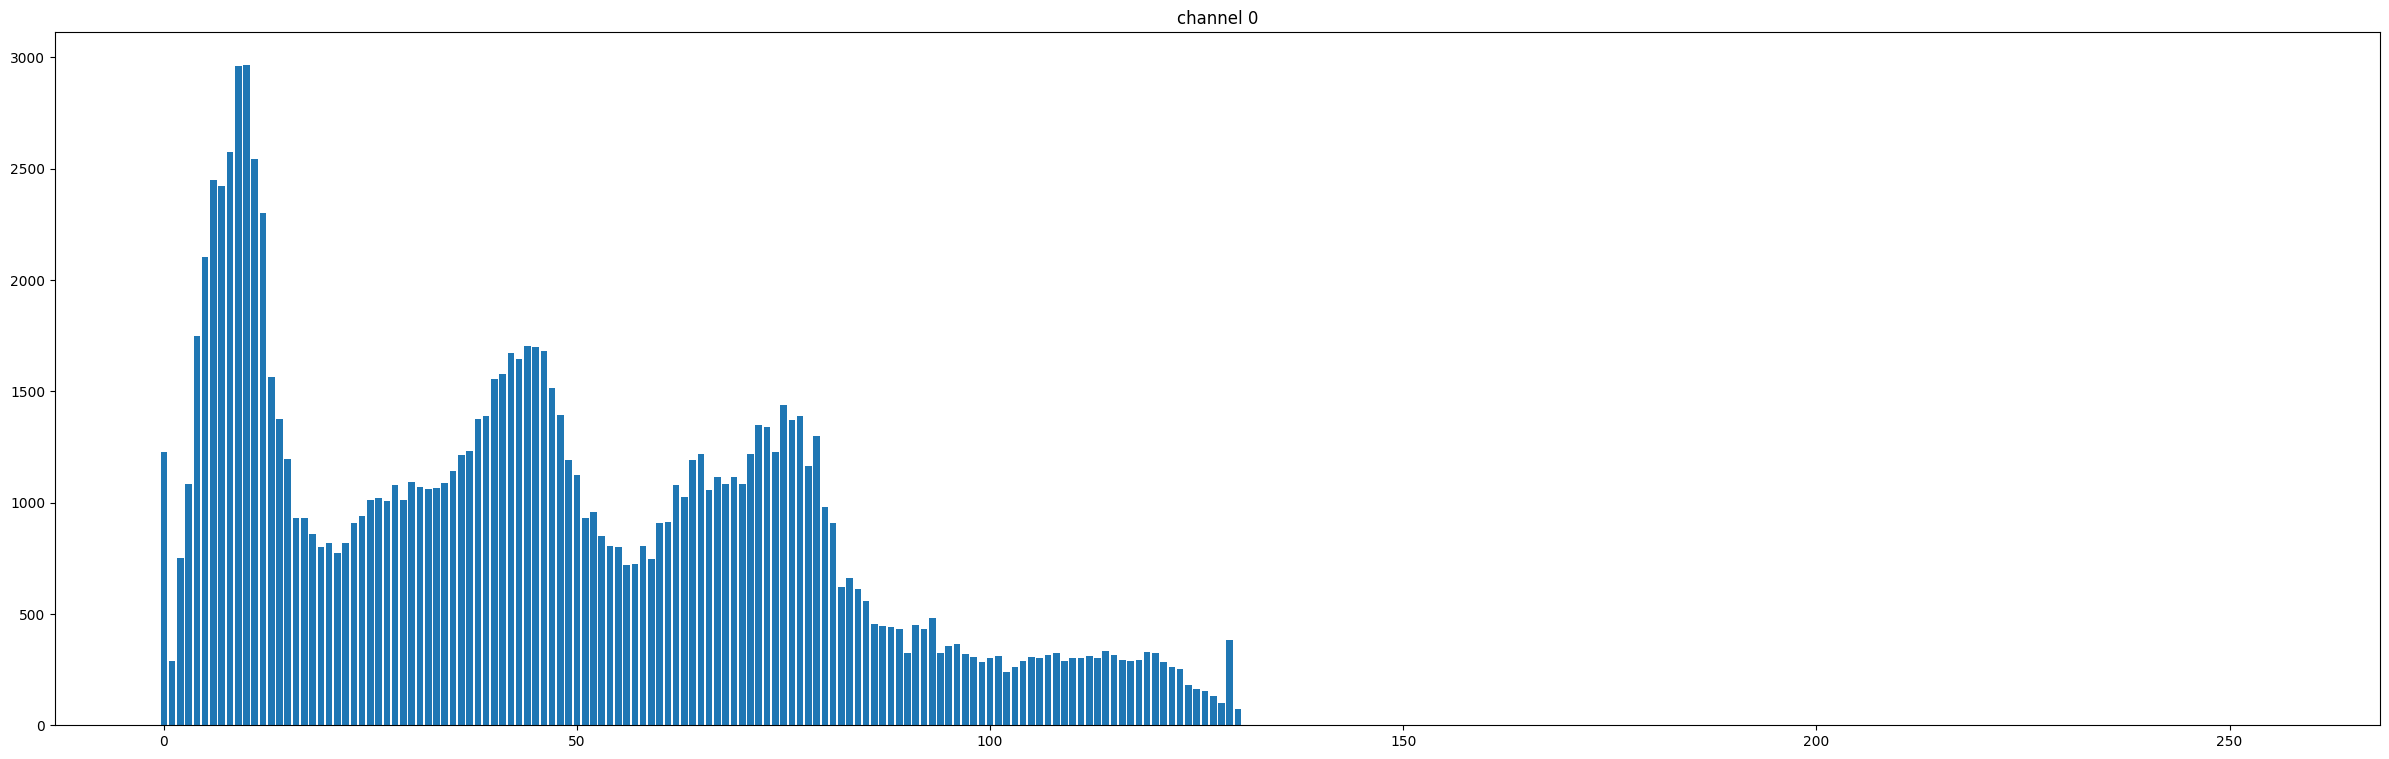

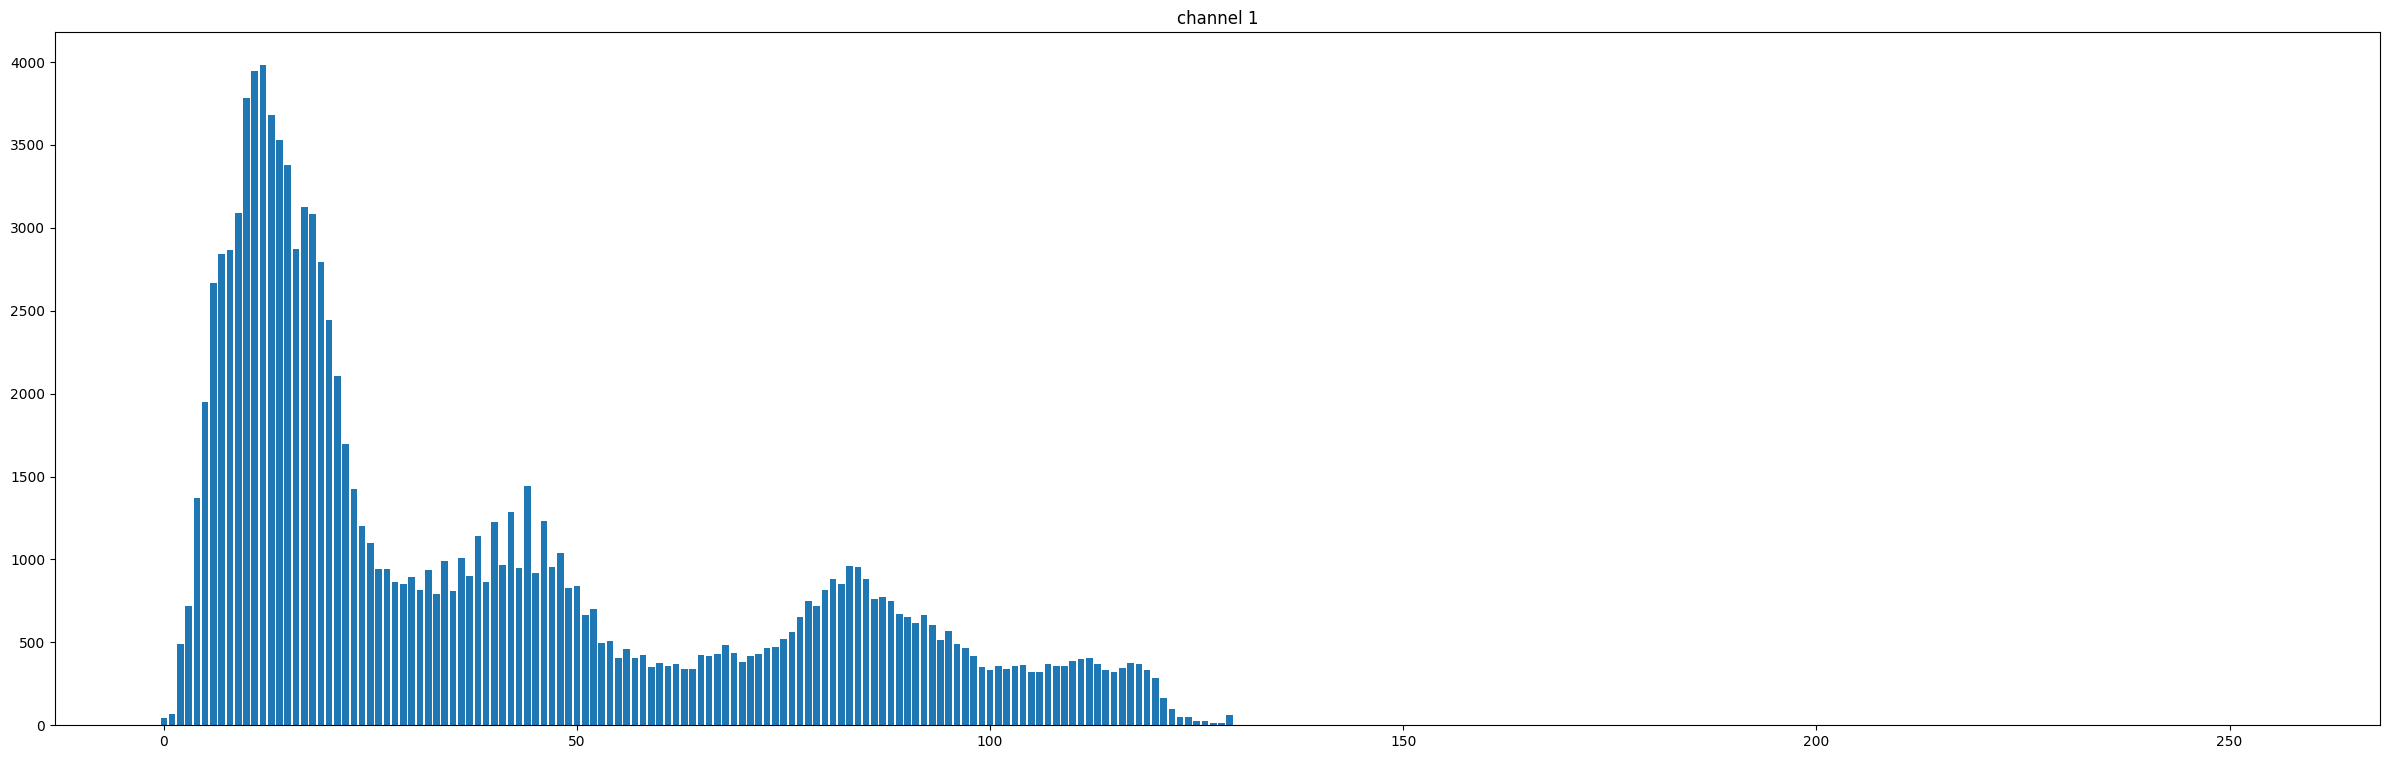

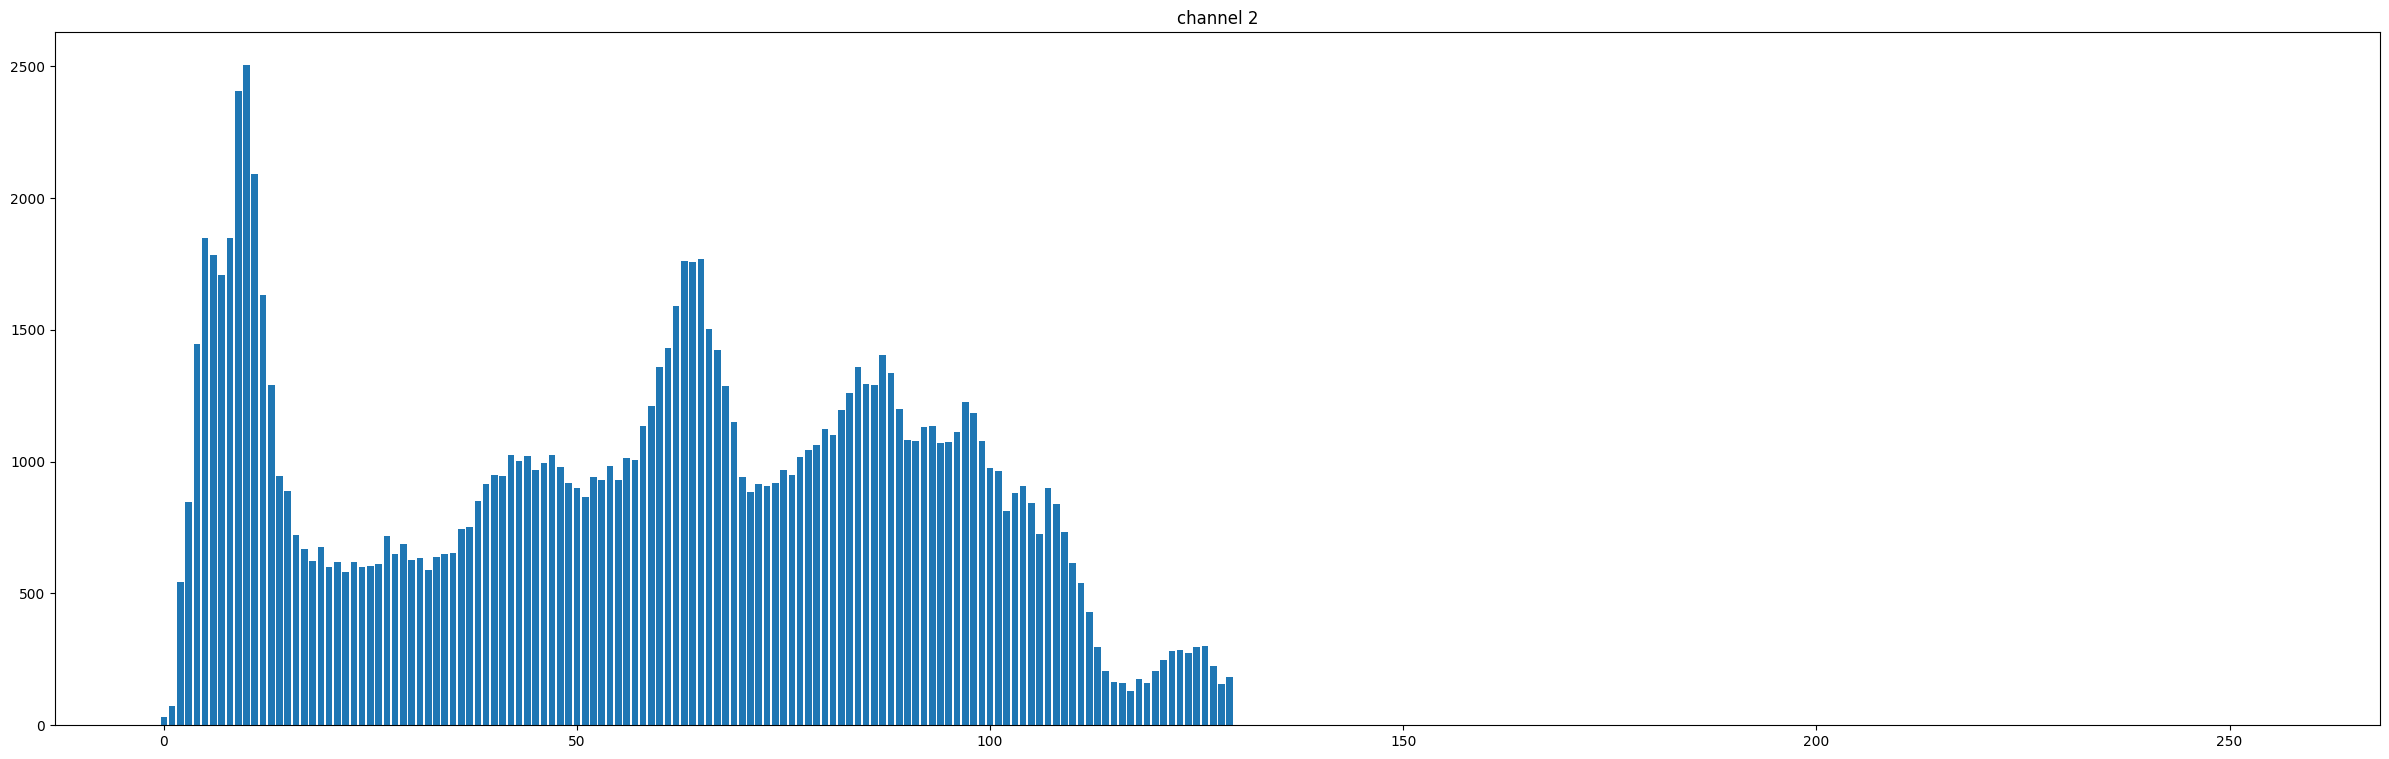

In [ ]:
imhist3(I)

# Don't do this!!! Equalize each RGB channel

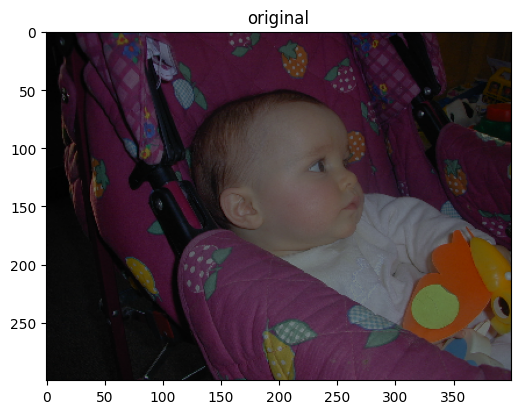

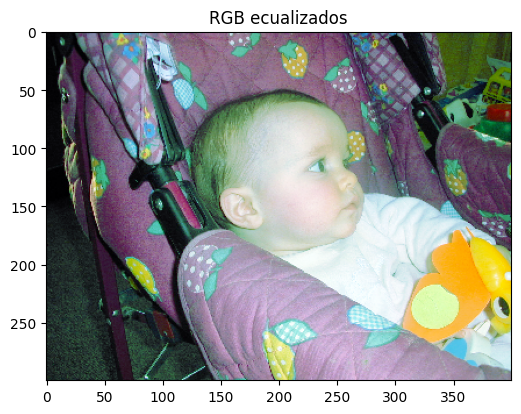

In [ ]:
J = I.copy()
J[:,:,0] = cv2.equalizeHist(I[:,:,0])
J[:,:,1] = cv2.equalizeHist(I[:,:,1])
J[:,:,2] = cv2.equalizeHist(I[:,:,2])
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(J, cv2.COLOR_BGR2RGB))
plt.title('RGB ecualizados')
plt.show()

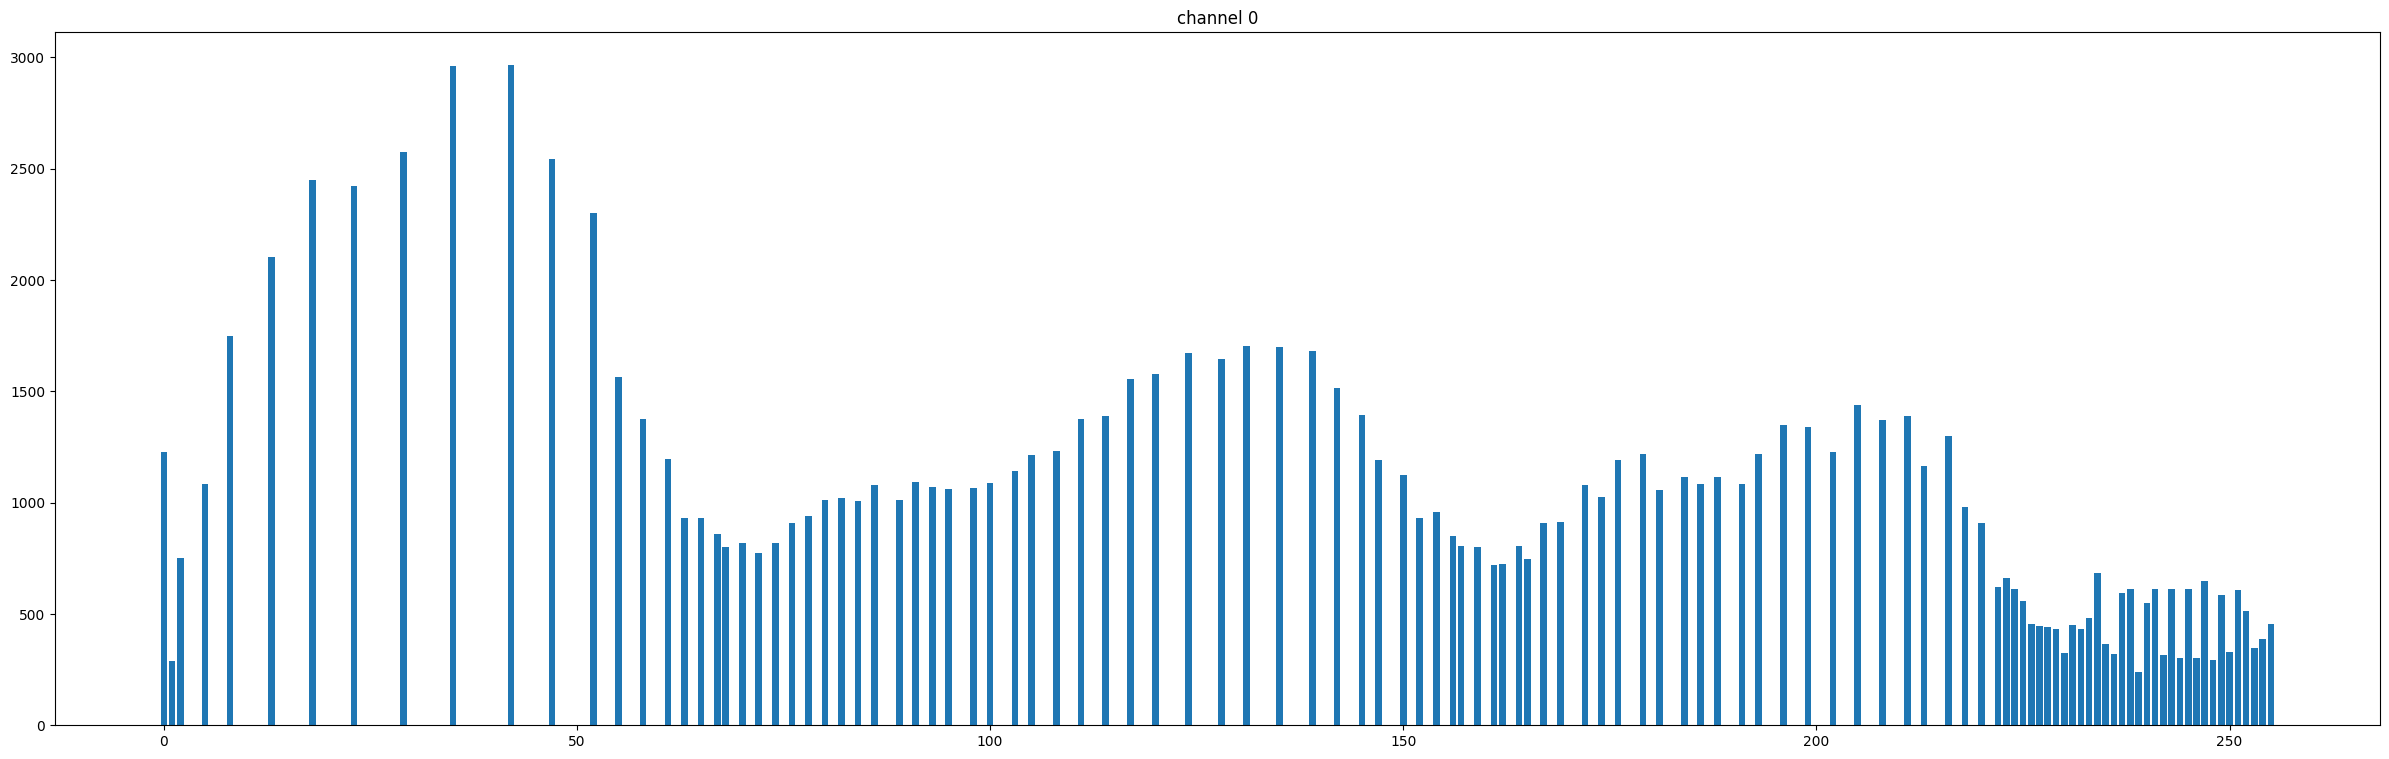

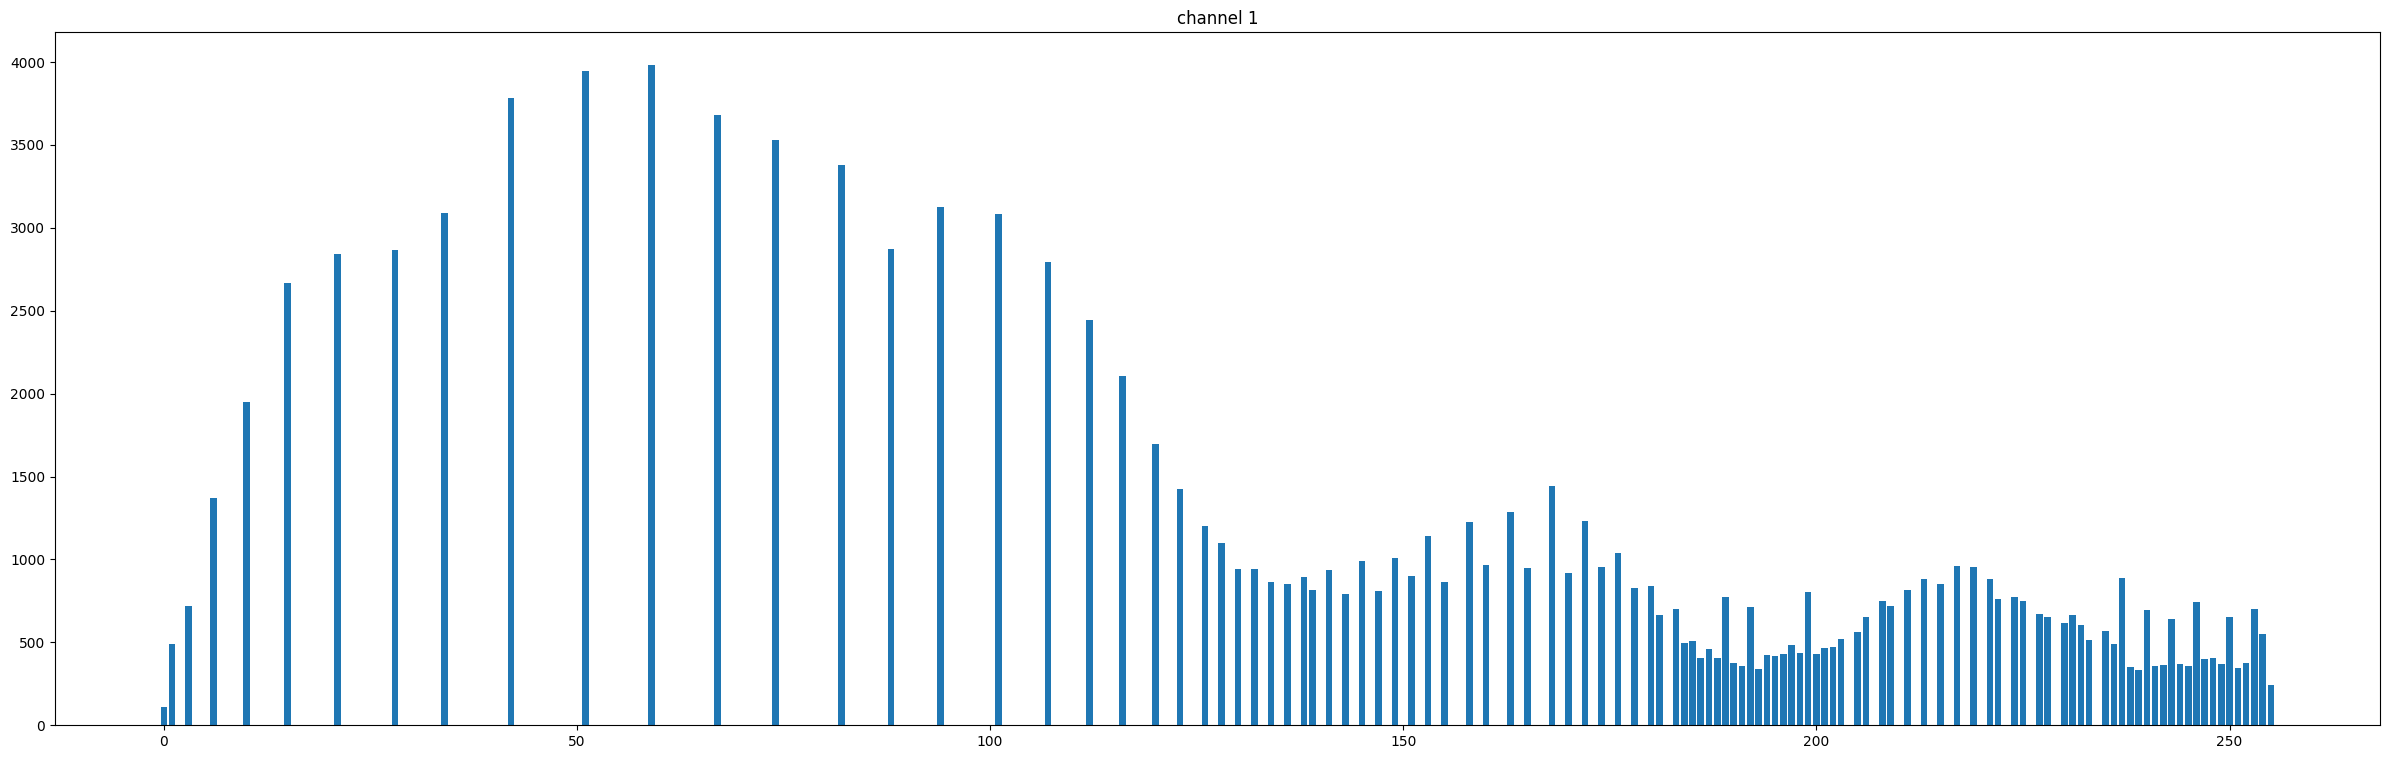

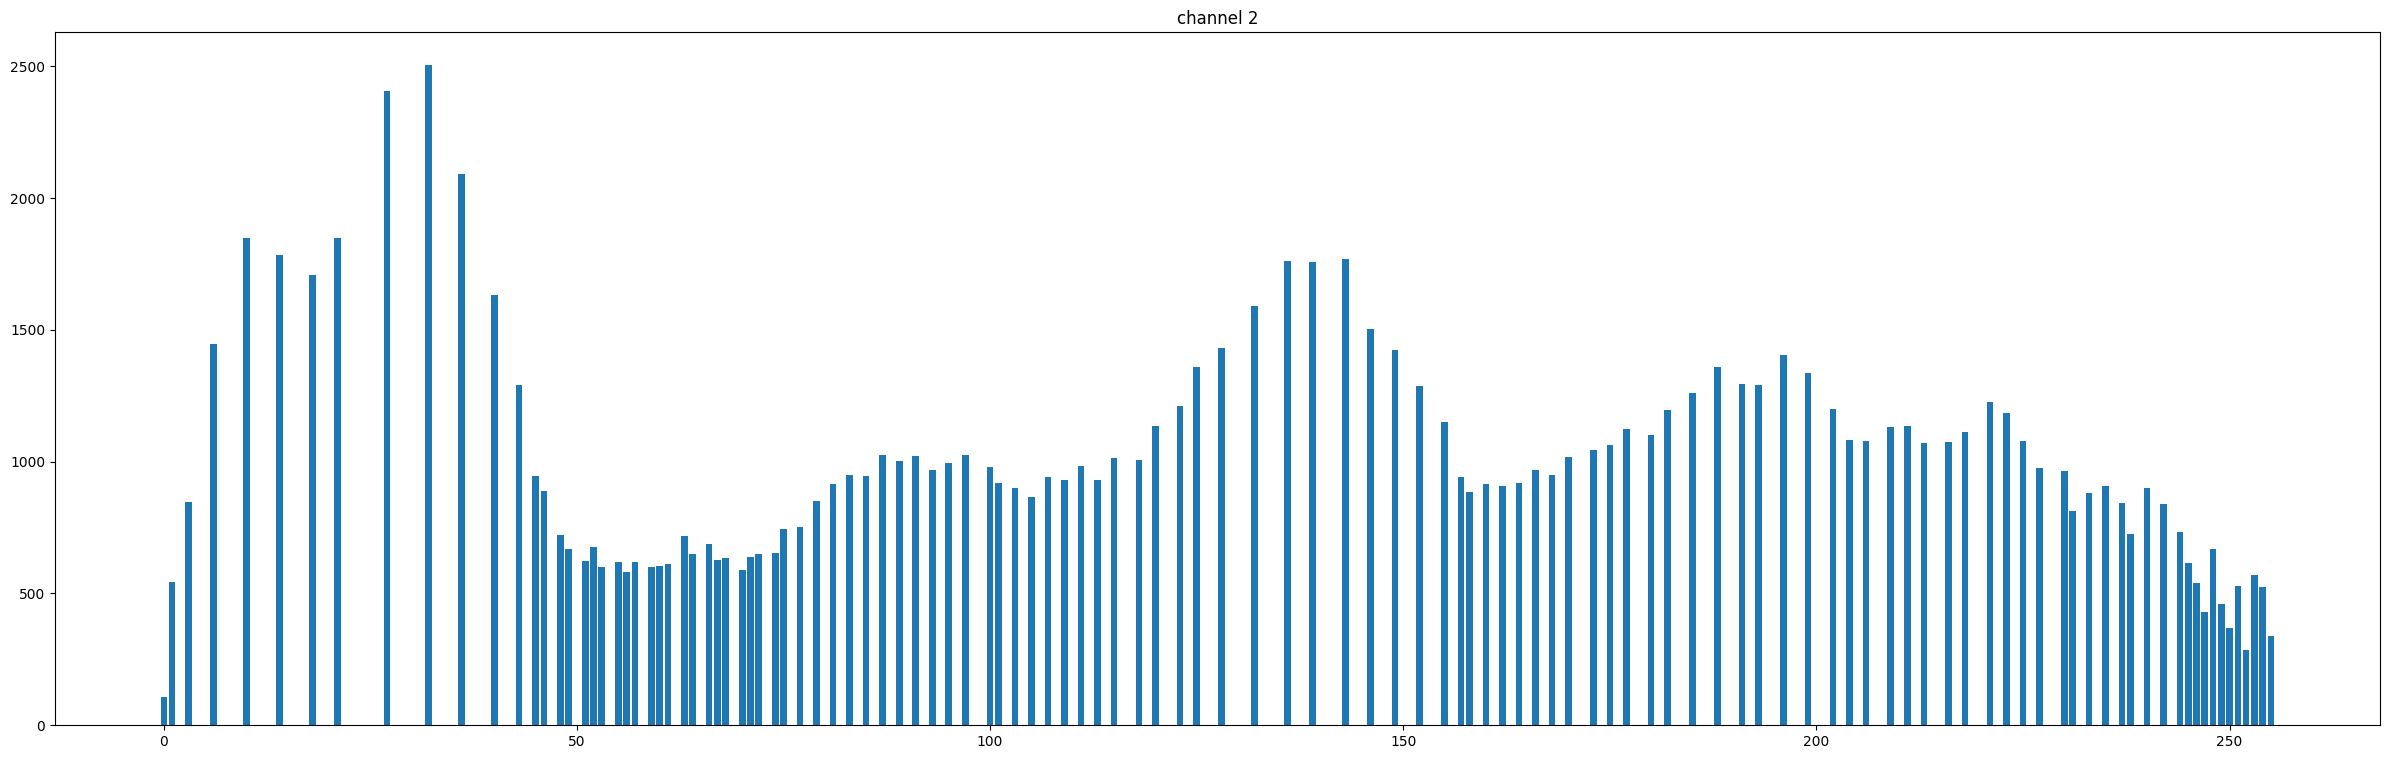

In [ ]:
imhist3(J)

# Do this!!: Equalize only V channel (of HSV image)

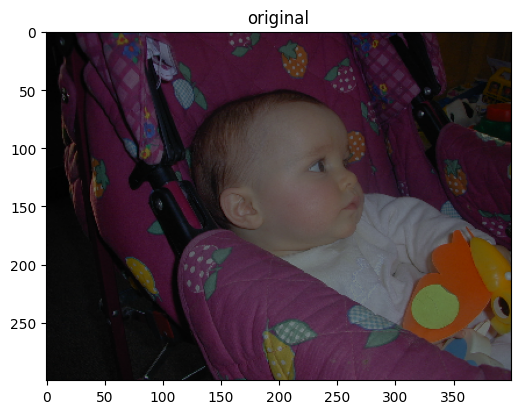

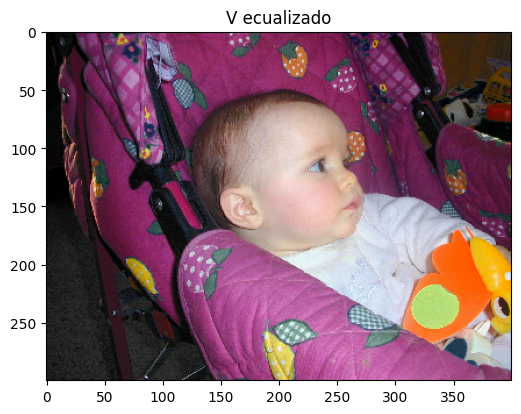

In [ ]:
K = I.copy()
Khsv = cv2.cvtColor(K, cv2.COLOR_BGR2HSV)
Khsv[:,:,2] = cv2.equalizeHist(K[:,:,2])
Knew = cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))
plt.title('V ecualizado')
plt.show()

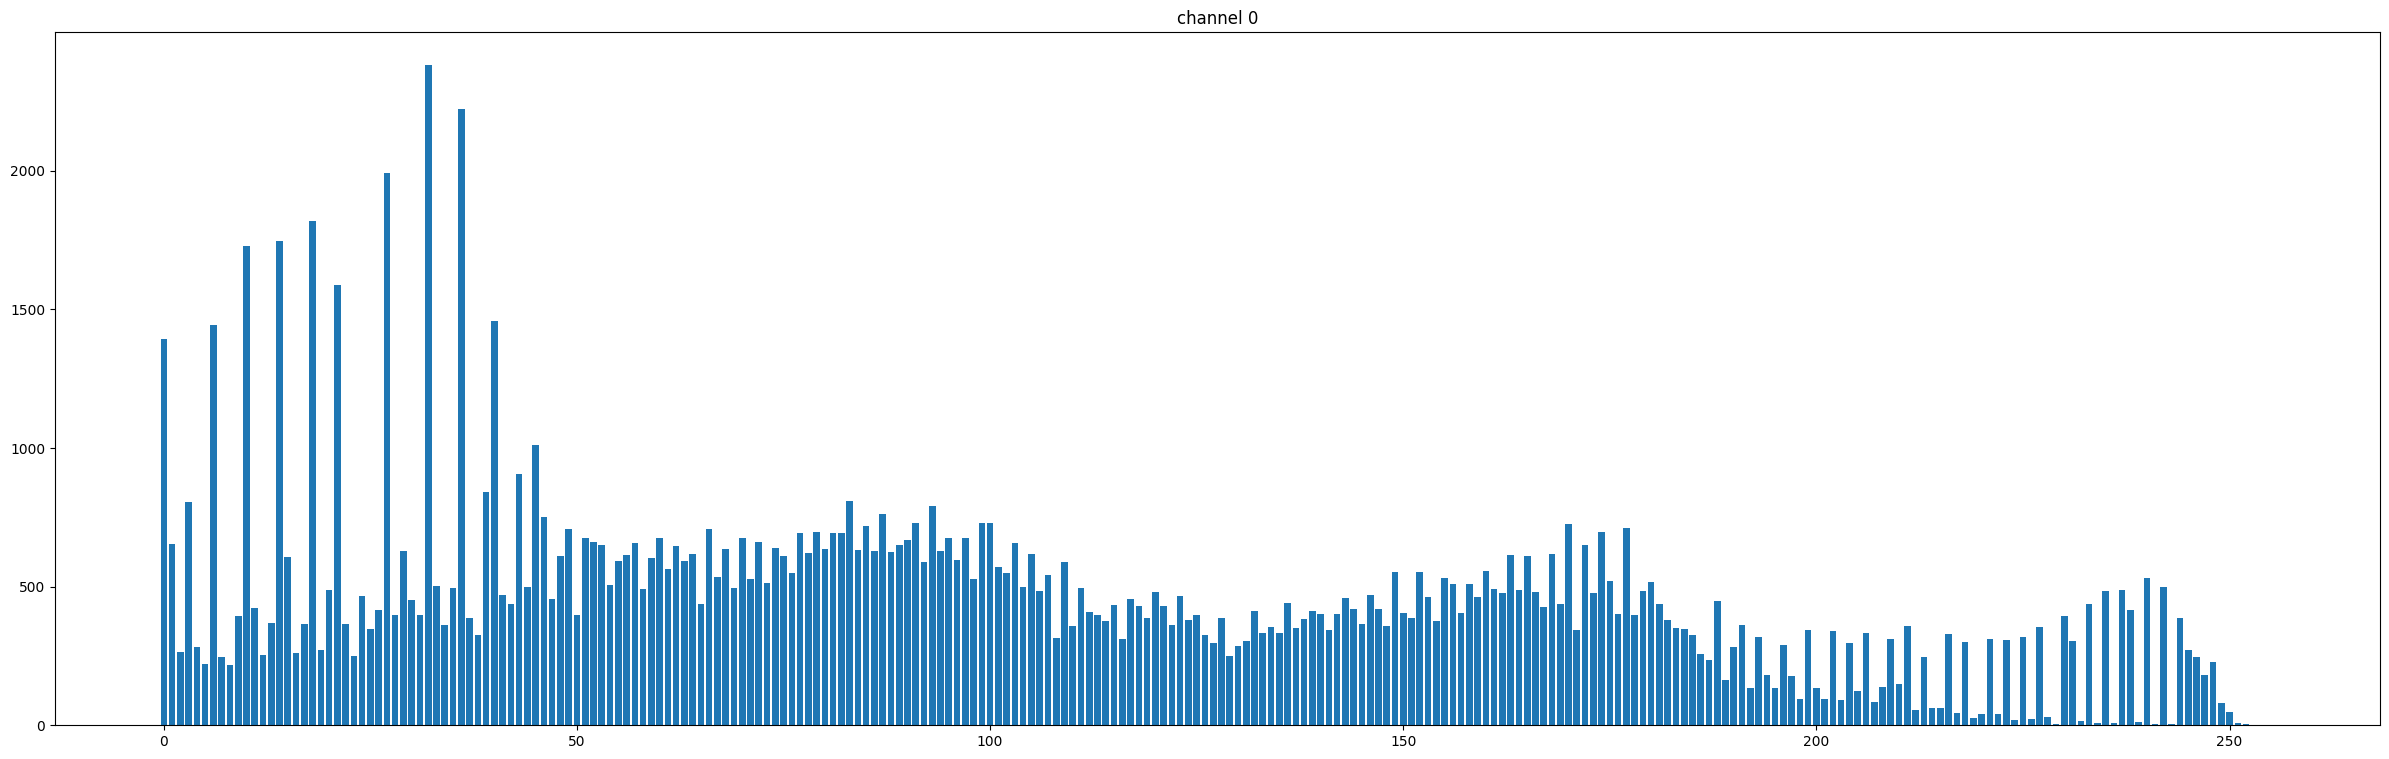

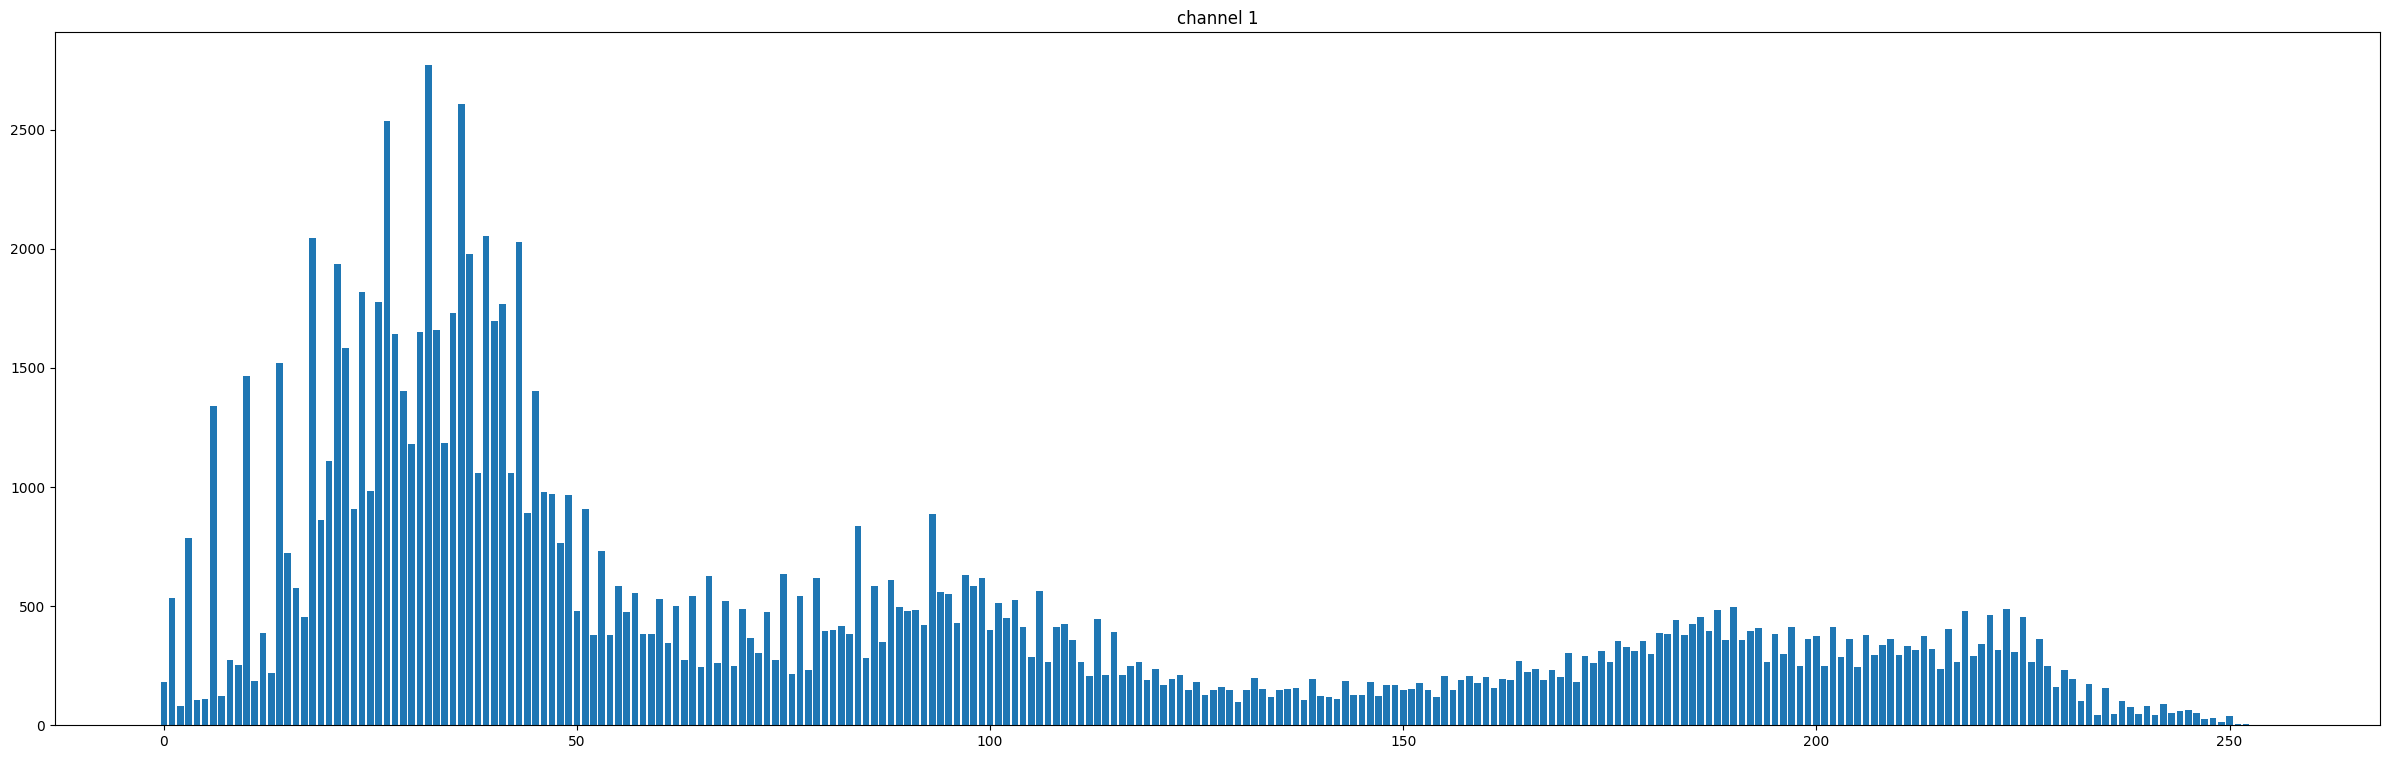

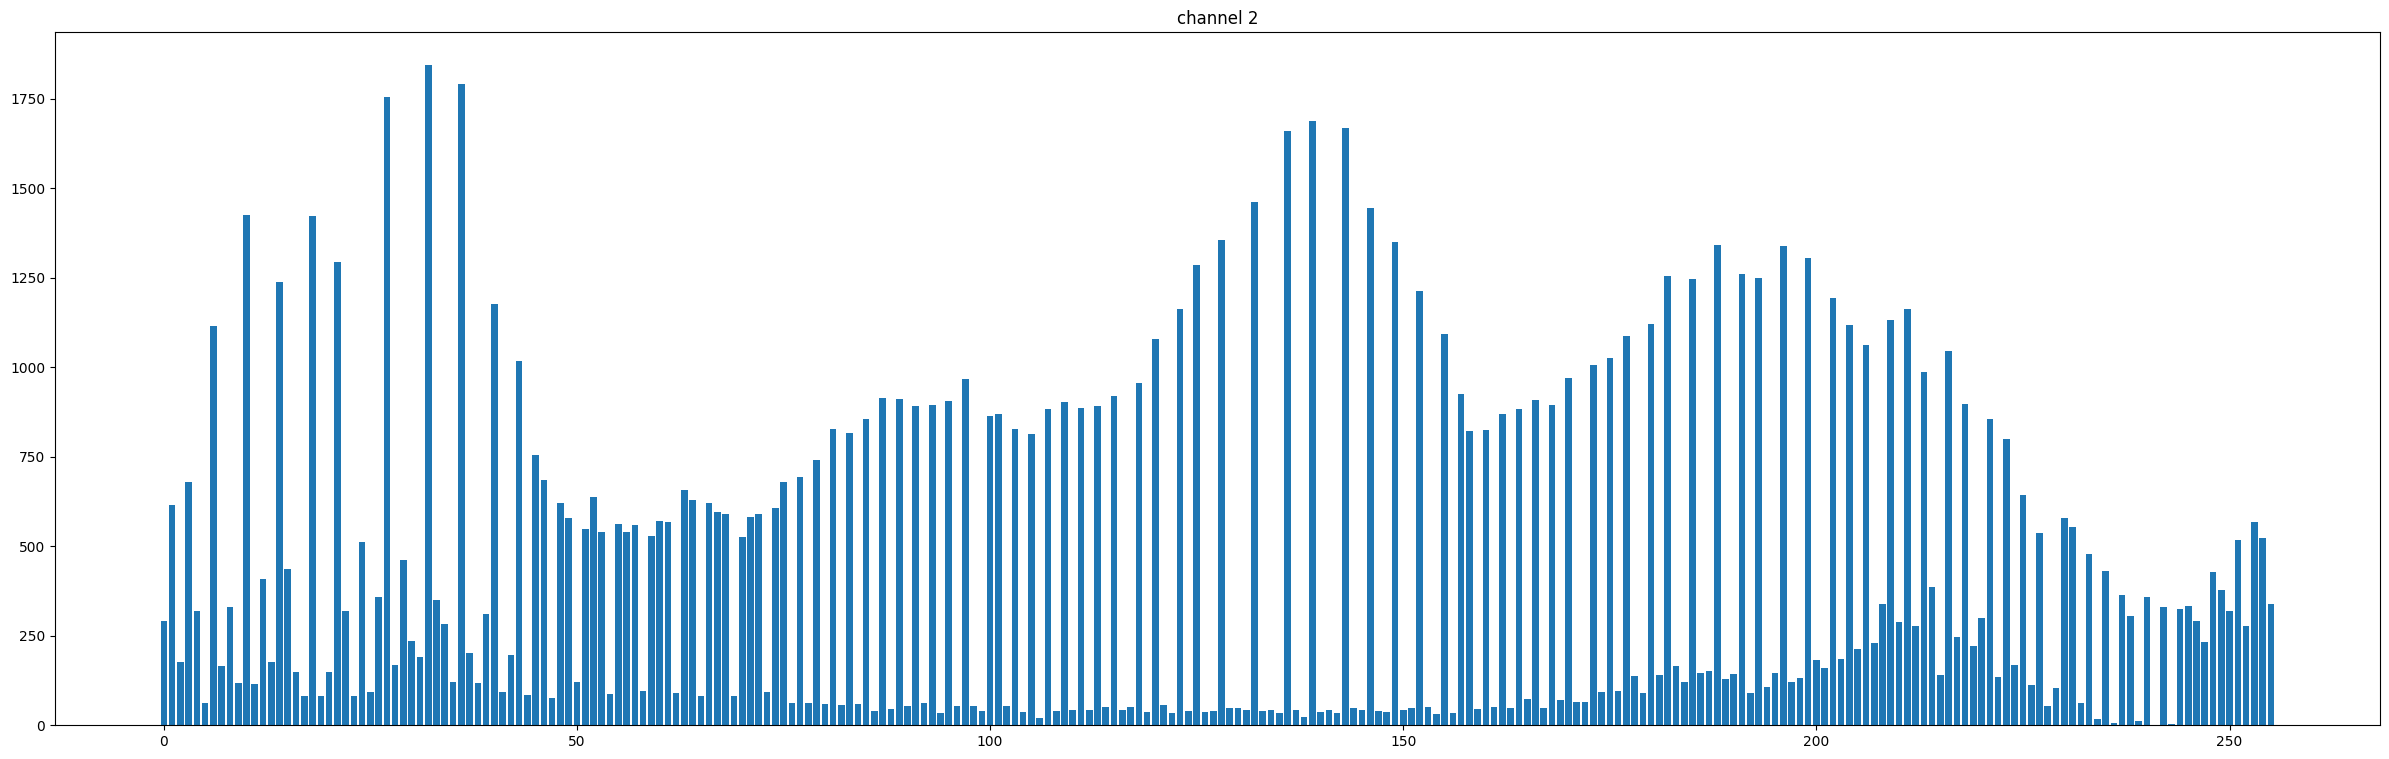

In [ ]:
imhist3(Knew)

# Conversion a Lab

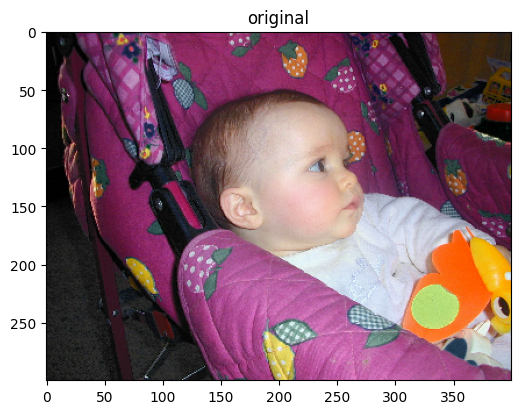

95


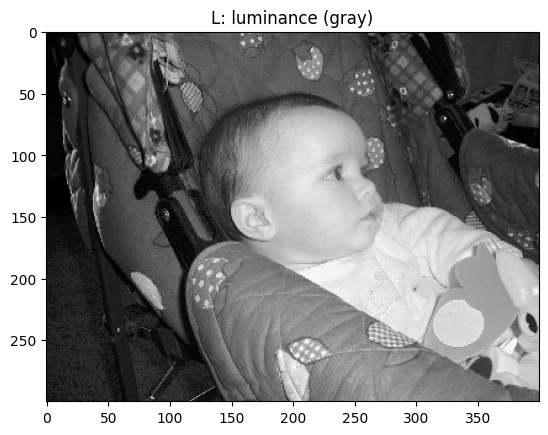

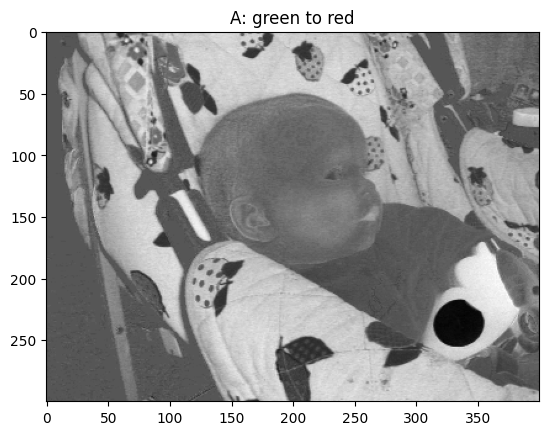

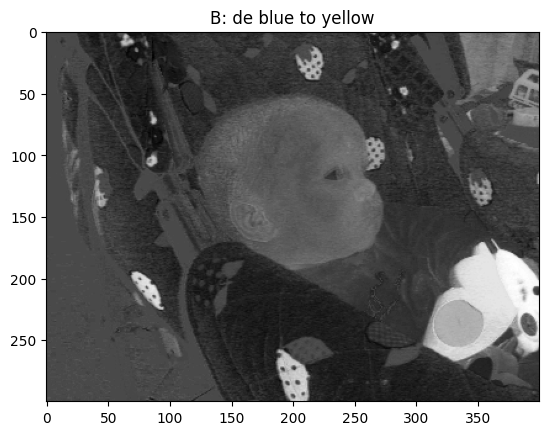

In [ ]:
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()

lab_image = cv2.cvtColor(Knew, cv2.COLOR_BGR2LAB)

L,A,B = cv2.split(lab_image)

print(np.min(A))

plt.imshow(L,cmap='gray')
plt.title('L: luminance (gray)')
plt.show()

plt.imshow(A,cmap='gray')
plt.title('A: green to red')
plt.show()

plt.imshow(B,cmap='gray')
plt.title('B: de blue to yellow')
plt.show()
